# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load & Preview**

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(categorical_cols)


['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
df_encoded.dtypes

,0
SeniorCitizen,int64
tenure,int64
MonthlyCharges,float64
TotalCharges,float64
customerID_0003-MKNFE,bool
...,...
PaperlessBilling_Yes,bool
PaymentMethod_Credit card (automatic),bool
PaymentMethod_Electronic check,bool
PaymentMethod_Mailed check,bool


In [ ]:
df_encoded.isnull().sum()

,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,11
customerID_0003-MKNFE,0
...,...
PaperlessBilling_Yes,0
PaymentMethod_Credit card (automatic),0
PaymentMethod_Electronic check,0
PaymentMethod_Mailed check,0


In [ ]:
df_encoded['TotalCharges'] = df_encoded['TotalCharges'].fillna(df_encoded['TotalCharges'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **EDA**

<Axes: xlabel='count', ylabel='Churn'>

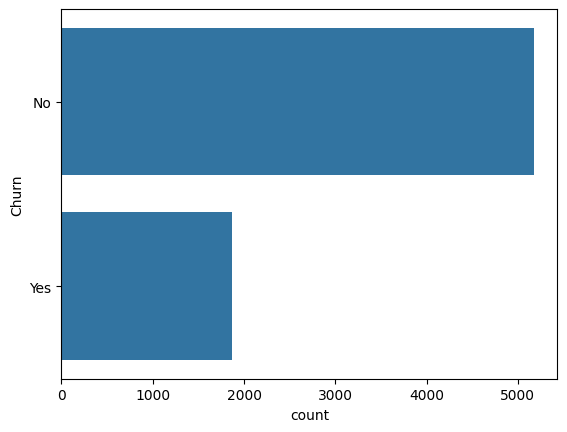

In [ ]:
# churn distribution
sns.countplot(df['Churn'])

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

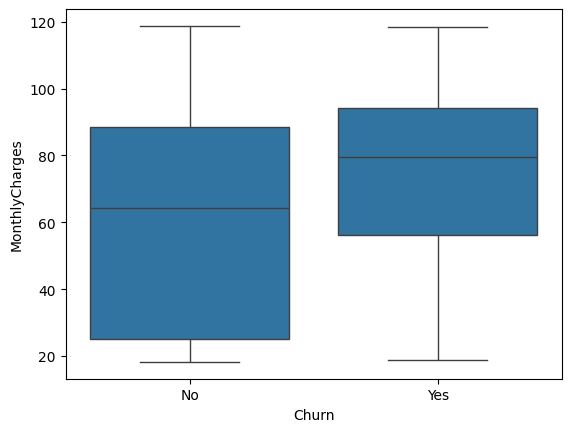

In [ ]:
#Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

<Axes: xlabel='Contract', ylabel='count'>

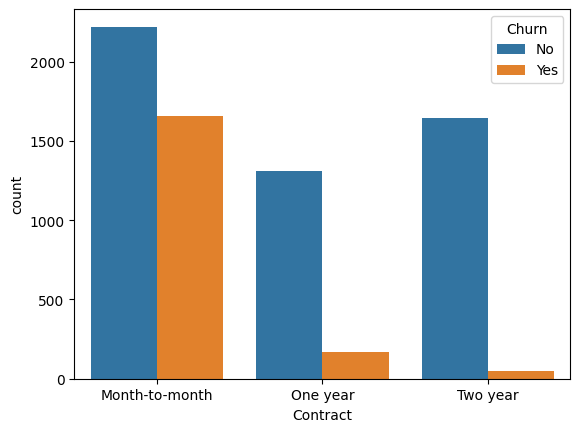

In [ ]:
# contract type vs churn
sns.countplot(x='Contract', hue='Churn', data=df)

<Axes: >

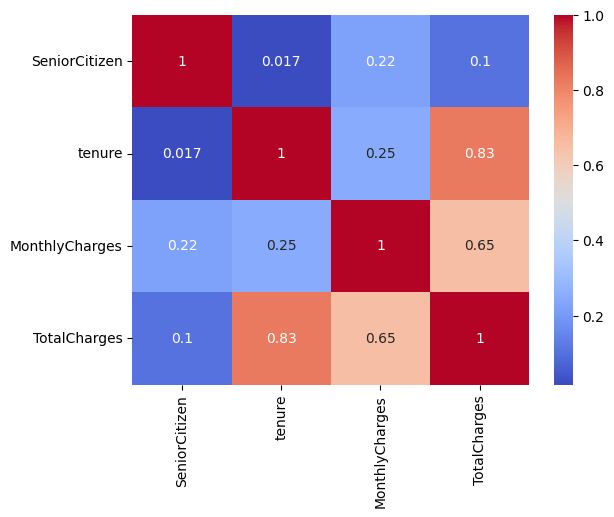

In [ ]:
# heatmap of numerical cols
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


# **Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Model Training & Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

       False       0.80      0.96      0.87      1036
        True       0.72      0.32      0.44       373

    accuracy                           0.79      1409
   macro avg       0.76      0.64      0.65      1409
weighted avg       0.78      0.79      0.75      1409



<Axes: >

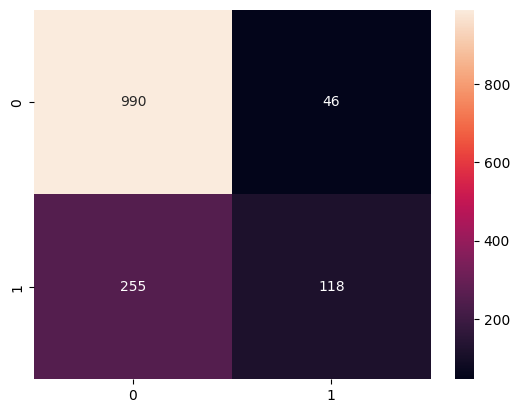

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
